In [1]:
# import libraries

import pandas as pd
import numpy as np
import requests

In [2]:
"""
Deprecated due to API limit

# pull hdb resale transactions from data.gov.sg
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3'
response = requests.get(url)
data = response.json()

# set search limit to 10,000 records. API shows error when set at 15,000+ records
search_params = {'limit': 10000}

# get total number of records from website

response = requests.get(url, params=search_params)
data = response.json()

# convert data to dataframe
df = pd.DataFrame(data['result']['records'])

"""

"\nDeprecated due to API limit\n\n# pull hdb resale transactions from data.gov.sg\nurl = 'https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3'\nresponse = requests.get(url)\ndata = response.json()\n\n# set search limit to 10,000 records. API shows error when set at 15,000+ records\nsearch_params = {'limit': 10000}\n\n# get total number of records from website\n\nresponse = requests.get(url, params=search_params)\ndata = response.json()\n\n# convert data to dataframe\ndf = pd.DataFrame(data['result']['records'])\n\n"

In [3]:
df = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158404 entries, 0 to 158403
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                158404 non-null  object 
 1   town                 158404 non-null  object 
 2   flat_type            158404 non-null  object 
 3   block                158404 non-null  object 
 4   street_name          158404 non-null  object 
 5   storey_range         158404 non-null  object 
 6   floor_area_sqm       158404 non-null  float64
 7   flat_model           158404 non-null  object 
 8   lease_commence_date  158404 non-null  int64  
 9   remaining_lease      158404 non-null  object 
 10  resale_price         158404 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.3+ MB


In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
## convert resale_price to integer
df['resale_price'] = df['resale_price'].astype('float')

In [7]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [8]:
""" 
Classify Ang Mo Kio, Bedok, Bishan, Bukit Merah, Bukit Timah, Central, Clementi, Geylang, Kallang/Whampoa, Marine Parade, Pasir Ris, Queenstown, Serangoon, Tampines, Toa Payoh as Mature Estates

Classify Bukit Batok, Bukit Panjang, Choa Chu Kang, Hougang, Jurong, Punggol, Sembawang, Sengkang, Tengah, Woodlands, Yishun to be classified as Non-Matured Estates
"""

mature_estates = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 'TAMPINES', 'TOA PAYOH']
non_mature_estates = ['BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'HOUGANG', 'JURONG', 'PUNGGOL', 'SEMBAWANG', 'SENGKANG', 'TENGAH', 'WOODLANDS', 'YISHUN']

# create new column to classify mature and non-mature estates
df['Estate Type'] = np.where(df['town'].isin(mature_estates), 'Matured Estate', 'Non-Matured Estate')

In [9]:
# convert month column to datetime
df['sale_period'] = pd.to_datetime(df['month'])

# split remaining_lease into months
df['remaining_lease_months'] = df['remaining_lease'].apply(lambda x: int(x.split(' ')[0])*12 + int(x.split(' ')[2]) if len(x.split(' ')) > 2 else int(x.split(' ')[0])*12)

In [10]:
# # reshuffle columns
df = df[['town',
         'Estate Type',
         'flat_type', 
         'flat_model', 
         'floor_area_sqm',
         'block',
         'street_name',
         'resale_price',
         'sale_period',
         'remaining_lease_months',
         'storey_range']]

In [11]:
# filter year column from 2017 onwards
df_filtered = df[df['sale_period'].dt.year >= 2017]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

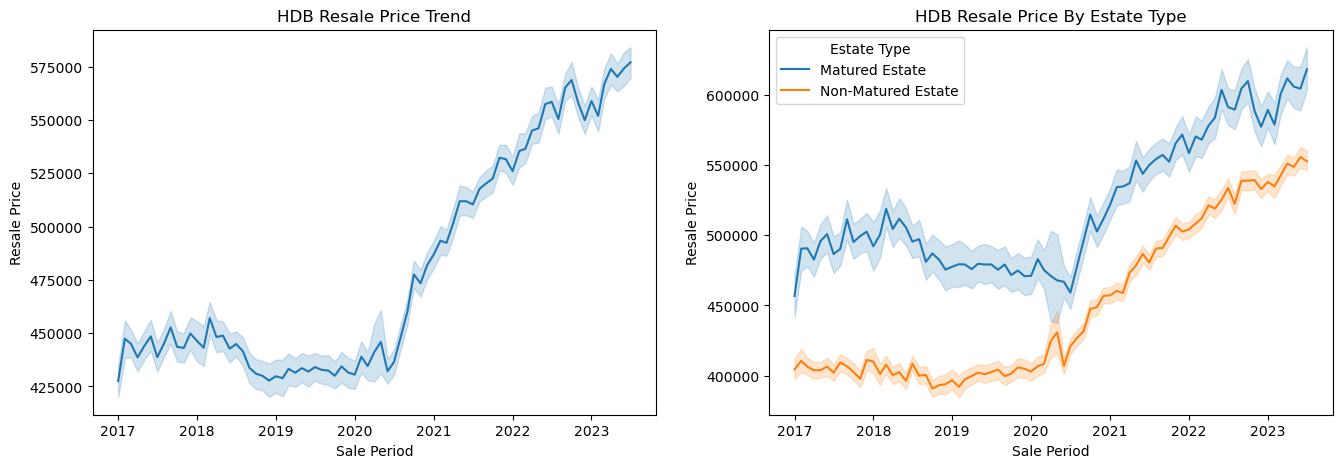

In [13]:
# create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

# create seaborn lineplot in ax1
sns.lineplot(
    x='sale_period', 
    y='resale_price', 
    data=df_filtered,
    ax=ax1)
ax1.set_title('HDB Resale Price Trend')
ax1.set_ylabel('Resale Price')
ax1.set_xlabel('Sale Period')

# create seaborn lineplot in ax2
sns.lineplot(
    x='sale_period', 
    y='resale_price', 
    data=df_filtered,
    hue='Estate Type', 
    ax=ax2)
ax2.set_title('HDB Resale Price By Estate Type')
ax2.set_ylabel('Resale Price')
ax2.set_xlabel('Sale Period')

# display plots
plt.show()

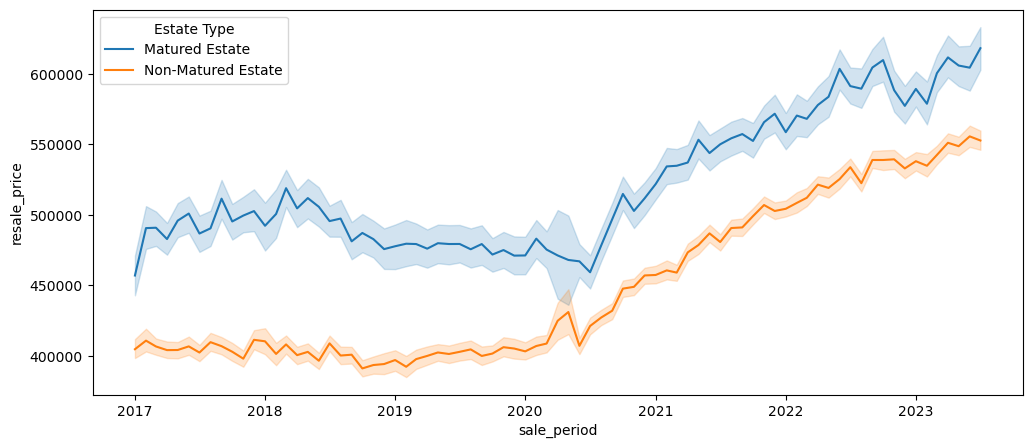

In [14]:
plt.subplots(figsize=(12,5))
sns.lineplot(x='sale_period', y='resale_price', data=df_filtered, hue='Estate Type')
plt.show()

In [15]:
num_towns = len(df['town'].unique())
print(num_towns)

26


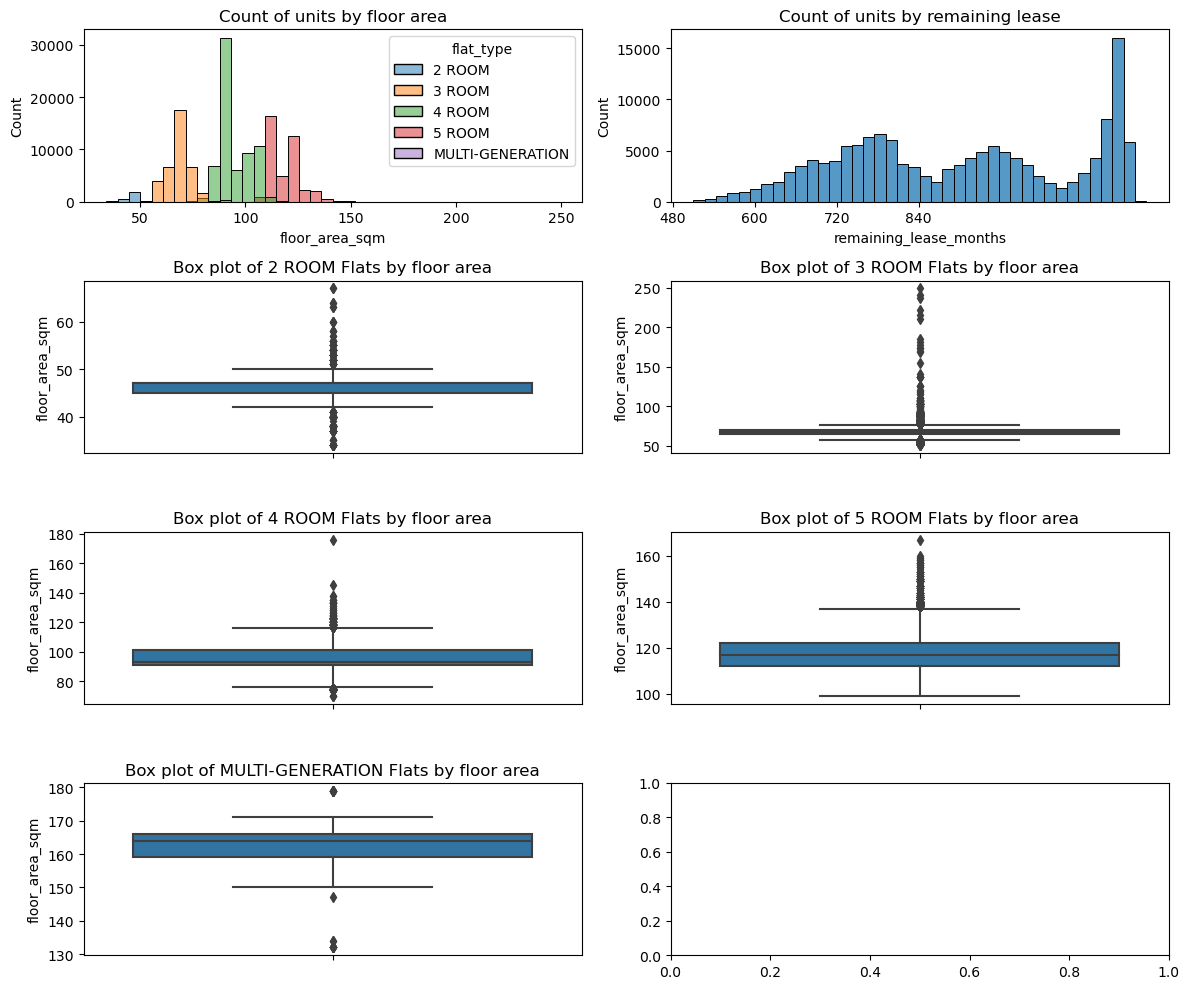

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2,figsize=(12,10))

df_filtered = df_filtered[(df_filtered['flat_type'] != '1 ROOM') & (df_filtered['flat_type'] != 'EXECUTIVE')]

# Plot 1: Count of units by floor area
sns.histplot(data = df_filtered, 
             x = 'floor_area_sqm',
             ax = ax1,
             bins = 40,
             hue = 'flat_type',)

ax1.set_title('Count of units by floor area')

# Plot 2: Count of units by remaining lease
sns.histplot(data = df_filtered,
             x = 'remaining_lease_months',
             ax = ax2,
             bins = 40)
ax2.set_title('Count of units by remaining lease')
ax2.set_xticks(np.arange(480, 960, 120))
ax2.set_xticklabels(np.arange(480, 960, 120))

# Plot 3: Box plot of 2 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '2 ROOM'],
            y = 'floor_area_sqm',
            ax = ax3)
ax3.set_title('Box plot of 2 ROOM Flats by floor area')

# Plot 4: Box plot of 3 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '3 ROOM'],
            y = 'floor_area_sqm',
            ax = ax4)
ax4.set_title('Box plot of 3 ROOM Flats by floor area')

# Plot 5: Box plot of 4 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '4 ROOM'],
            y = 'floor_area_sqm',
            ax = ax5)
ax5.set_title('Box plot of 4 ROOM Flats by floor area')

# Plot 6: Box plot of 5 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '5 ROOM'],
            y = 'floor_area_sqm',
            ax = ax6)
ax6.set_title('Box plot of 5 ROOM Flats by floor area')

# Plot 7: Box plot of MULTI-GENERATION Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == 'MULTI-GENERATION'],
            y = 'floor_area_sqm',
            ax = ax7)
ax7.set_title('Box plot of MULTI-GENERATION Flats by floor area')

plt.tight_layout()
plt.show()

In [17]:
print(f"Potential Count of Outliers: {len(df_filtered[(df_filtered['flat_type'] == '2 ROOM') & (df_filtered['floor_area_sqm'] > 50)])}")
print(f"Count of 2 ROOM Flats: {len(df_filtered[df_filtered['flat_type'] == '2 ROOM'])}")

Potential Count of Outliers: 92
Count of 2 ROOM Flats: 2549


Correlation coefficient:  0.3939474784099437


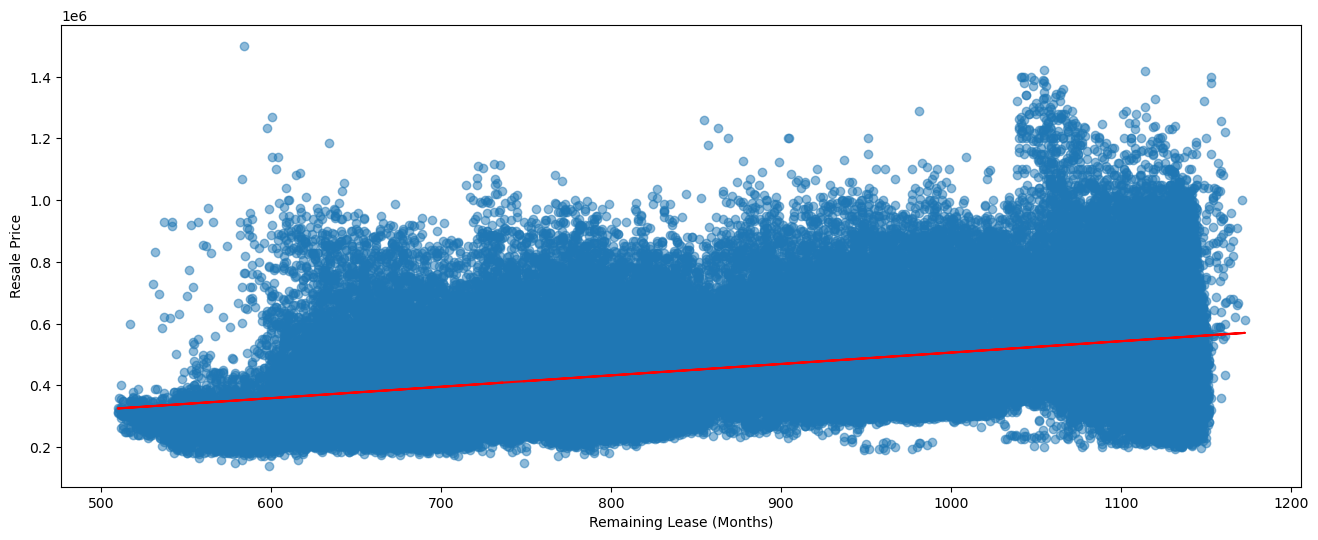

In [18]:
# resale price vs remaining lease months
# create scatter plot
plt.subplots(figsize=(16, 6))
plt.scatter(x=df_filtered['remaining_lease_months'], y=df_filtered['resale_price'], alpha=0.5)
plt.xlabel('Remaining Lease (Months)')
plt.ylabel('Resale Price')

# create linear regression line
x = df_filtered['remaining_lease_months']
y = df_filtered['resale_price']
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, color='red')

# calculate correlation coefficient
corr = df_filtered['remaining_lease_months'].corr(df['resale_price'])
print('Correlation coefficient: ', corr)



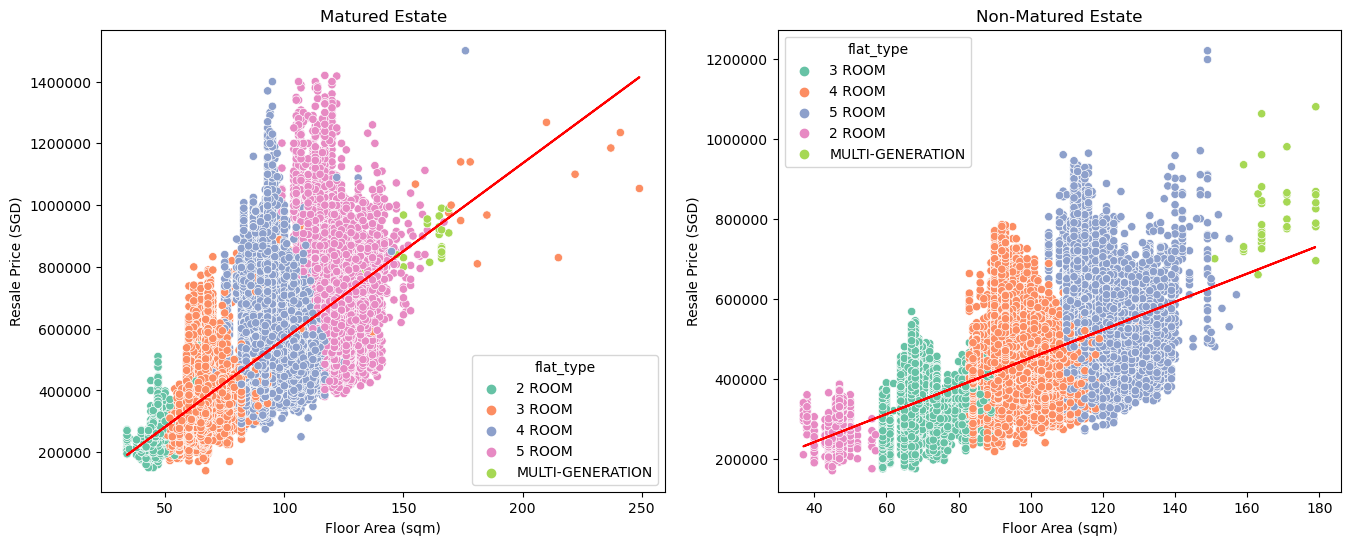

Correlation coefficient for matured estate:  0.6379002902959192
Correlation coefficient for non-matured estate:  0.5671898916900698


In [19]:
# resale price vs floor area split by estate type

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# plot resale price vs floor area by mature estates
sns.scatterplot(x='floor_area_sqm', 
                y='resale_price', 
                data=df_filtered[(df_filtered['Estate Type']=='Matured Estate') & (df_filtered['flat_type']!='1 ROOM')], 
                hue= 'flat_type', 
                ax=ax1,
                palette='Set2')

ax1.set_title('Matured Estate')
ax1.set_xlabel('Floor Area (sqm)')
ax1.set_ylabel('Resale Price (SGD)')

# show full y value without truncation
ax1.get_yaxis().get_major_formatter().set_scientific(False)

x = df_filtered[df_filtered['Estate Type']=='Matured Estate']['floor_area_sqm']
y = df_filtered[df_filtered['Estate Type']=='Matured Estate']['resale_price']
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, color='red')

# plot resale price vs floor area by non-mature estates
sns.scatterplot(x='floor_area_sqm', 
                y='resale_price', 
                data=df_filtered[df_filtered['Estate Type']=='Non-Matured Estate'], 
                hue= 'flat_type',
                ax=ax2,
                palette='Set2')

ax2.set_title('Non-Matured Estate')
ax2.set_xlabel('Floor Area (sqm)')
ax2.set_ylabel('Resale Price (SGD)')
ax2.get_yaxis().get_major_formatter().set_scientific(False)

x = df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['floor_area_sqm']
y = df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['resale_price']
m, b = np.polyfit(x, y, 1)
ax2.plot(x, m*x + b, color='red')

plt.show()

# identify correlation coefficient
print('Correlation coefficient for matured estate: ', df_filtered[df_filtered['Estate Type']=='Matured Estate']['floor_area_sqm'].corr(df_filtered[df_filtered['Estate Type']=='Matured Estate']['resale_price']))
print('Correlation coefficient for non-matured estate: ', df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['floor_area_sqm'].corr(df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['resale_price']))





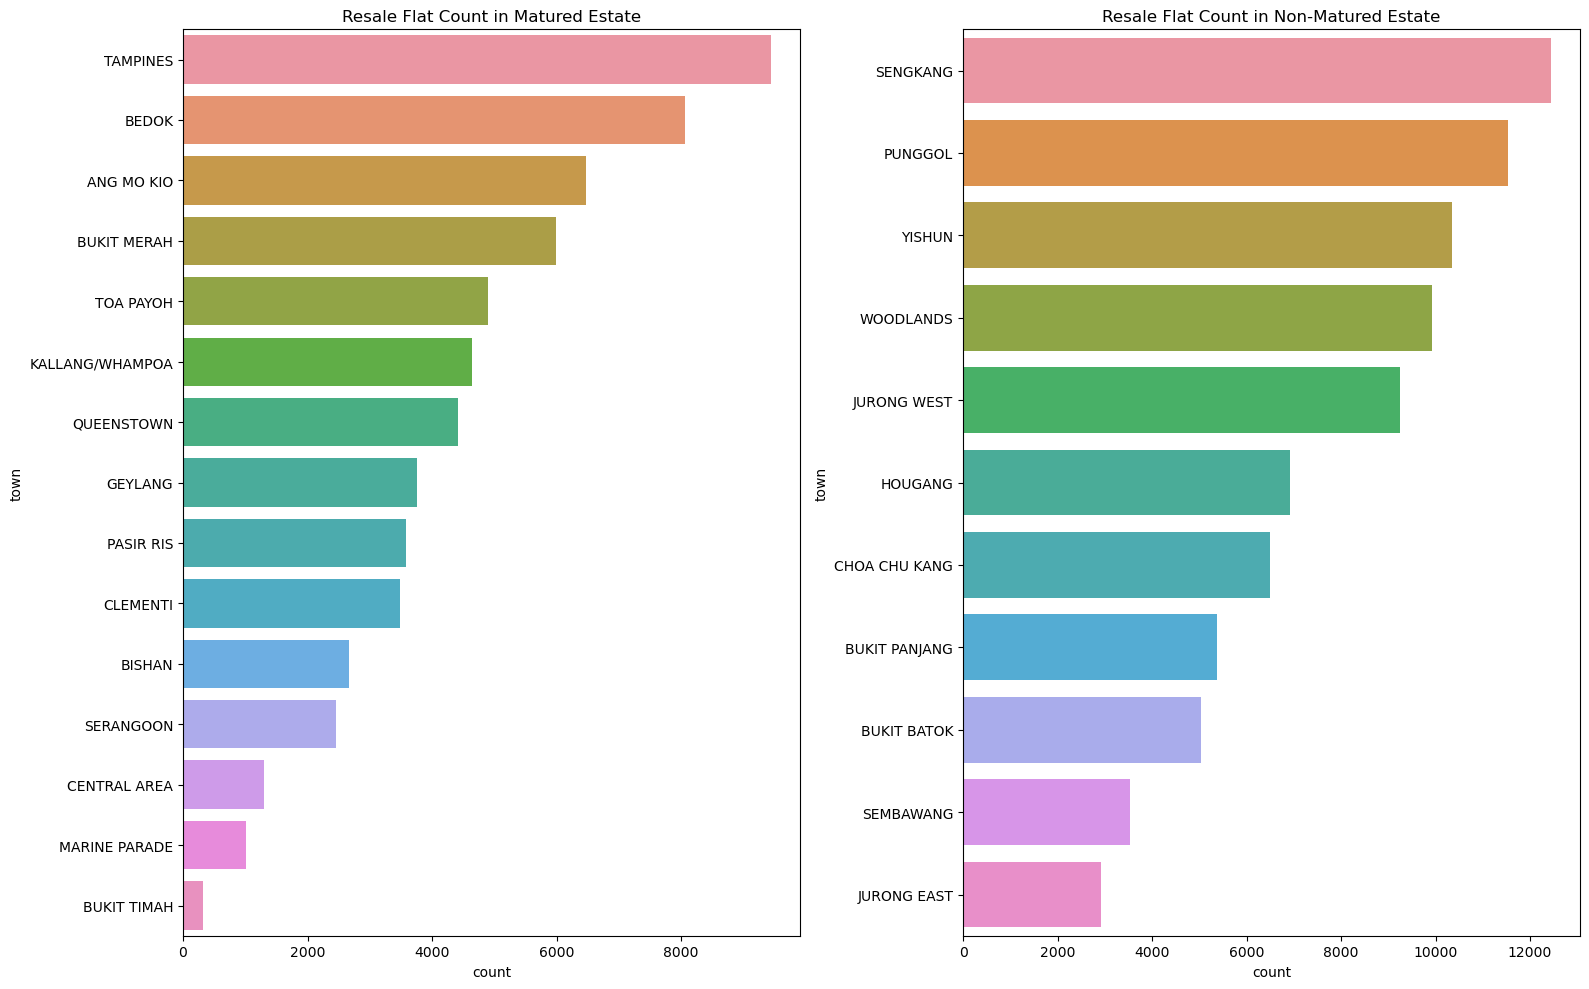

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 10))

# Plot 1: Count of resale flats in matured estates
sns.countplot(y='town',
              data = df_filtered[df_filtered['Estate Type'] == 'Matured Estate'],
              order = df_filtered[df_filtered['Estate Type'] == 'Matured Estate']['town'].value_counts().index,
              ax=ax1
              )

ax1.set_title('Resale Flat Count in Matured Estate')

# Plot 2: Counter of resale flats in non-matured estates
sns.countplot(y='town',
              data = df_filtered[df_filtered['Estate Type'] == 'Non-Matured Estate'],
              order = df_filtered[df_filtered['Estate Type'] == 'Non-Matured Estate']['town'].value_counts().index,
              ax=ax2
              )
ax2.set_title('Resale Flat Count in Non-Matured Estate')

plt.tight_layout()
plt.show()

In [21]:
# add new column 'psf' to the dataframe
# psf = price per square feet

df_filtered['psf'] = df_filtered['resale_price'] / (df_filtered['floor_area_sqm'] * 10.764)

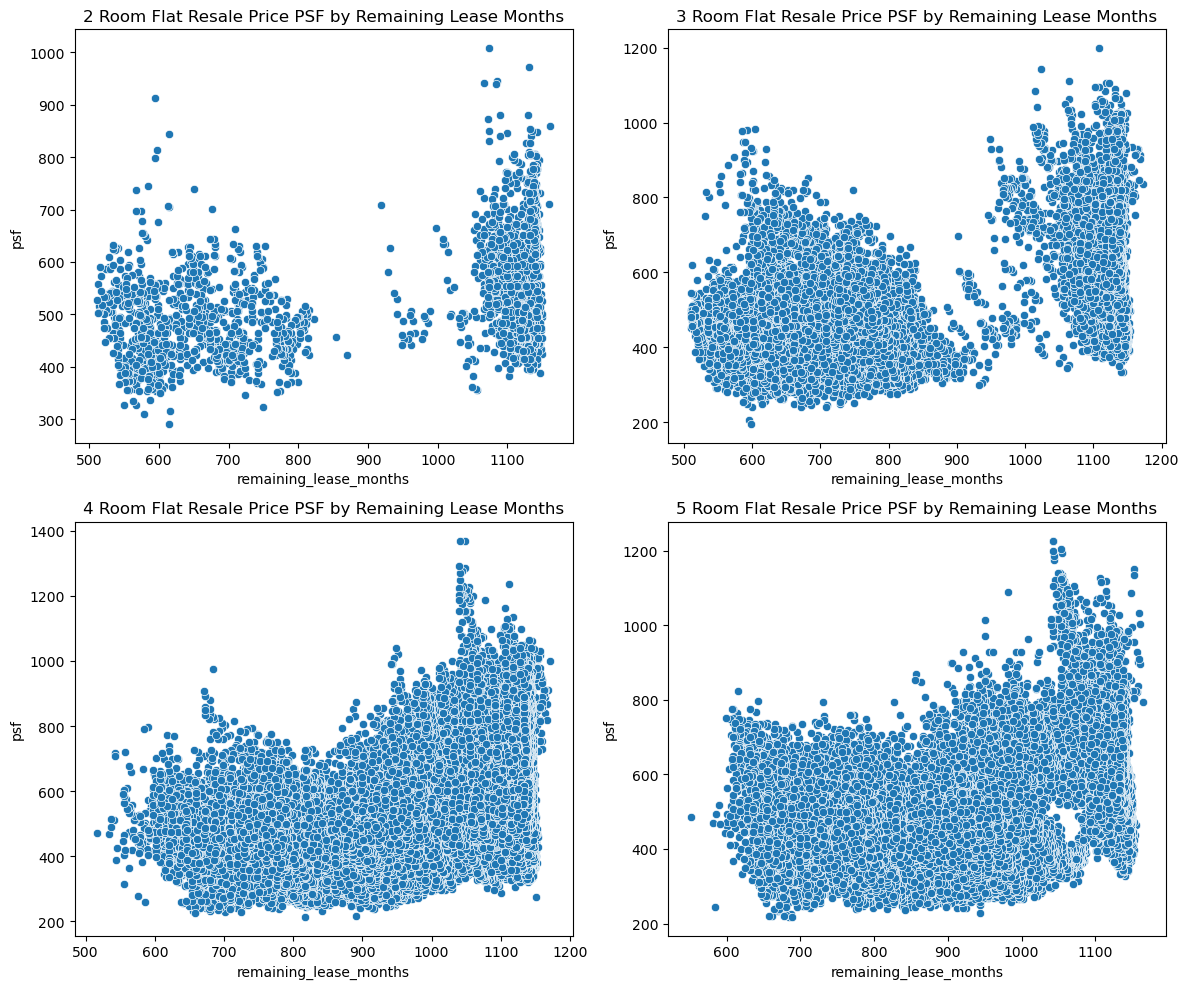

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,10))

df_filtered = df_filtered[(df_filtered['flat_type'] != '1 ROOM') & (df_filtered['flat_type'] != 'EXECUTIVE')]

# Plot 1: 2 ROOM Flat PSF by Remaining Lease Months

sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '2 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax1)
ax1.set_title('2 Room Flat Resale Price PSF by Remaining Lease Months')

# Plot 2: 3 ROOM Flat PSF by Remaining Lease Months

sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '3 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax2)
ax2.set_title('3 Room Flat Resale Price PSF by Remaining Lease Months')

# Plot 3: 4 ROOM Flat PSF by Remaining Lease Months

sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '4 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax3)
ax3.set_title('4 Room Flat Resale Price PSF by Remaining Lease Months')

# Plot 5: 5 ROOM Flat PSF by Remaining Lease Months
sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '5 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax4)
ax4.set_title('5 Room Flat Resale Price PSF by Remaining Lease Months')

plt.tight_layout()
plt.show()

## Time Forecasting with Prophet

In [23]:
df_filtered.head()

,town,Estate Type,flat_type,flat_model,floor_area_sqm,block,street_name,resale_price,sale_period,remaining_lease_months,storey_range,psf
0,ANG MO KIO,Matured Estate,2 ROOM,Improved,44.0,406,ANG MO KIO AVE 10,232000.0,2017-01-01,736,10 TO 12,489.848316
1,ANG MO KIO,Matured Estate,3 ROOM,New Generation,67.0,108,ANG MO KIO AVE 4,250000.0,2017-01-01,727,01 TO 03,346.650249
2,ANG MO KIO,Matured Estate,3 ROOM,New Generation,67.0,602,ANG MO KIO AVE 5,262000.0,2017-01-01,749,01 TO 03,363.289461
3,ANG MO KIO,Matured Estate,3 ROOM,New Generation,68.0,465,ANG MO KIO AVE 10,265000.0,2017-01-01,745,04 TO 06,362.045599
4,ANG MO KIO,Matured Estate,3 ROOM,New Generation,67.0,601,ANG MO KIO AVE 5,265000.0,2017-01-01,749,01 TO 03,367.449264


In [24]:
agg_df = df_filtered.groupby(['town', 'flat_type', 'floor_area_sqm', 'sale_period'])['resale_price'].mean().reset_index().sort_values(by='resale_price')

In [25]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51884 entries, 17982 to 10433
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   town            51884 non-null  object        
 1   flat_type       51884 non-null  object        
 2   floor_area_sqm  51884 non-null  float64       
 3   sale_period     51884 non-null  datetime64[ns]
 4   resale_price    51884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.4+ MB


In [26]:
def col_to_tuples(row,col):
    return tuple(row[c] for c in col)

agg_df['encoded_params'] = agg_df.apply(lambda x: col_to_tuples(x,['town','flat_type', 'floor_area_sqm', 'sale_period']), axis=1)

In [27]:
agg_df.head()

,town,flat_type,floor_area_sqm,sale_period,resale_price,encoded_params
17982,GEYLANG,2 ROOM,45.0,2019-10-01,150000.0,"(GEYLANG, 2 ROOM, 45.0, 2019-10-01 00:00:00)"
44307,TOA PAYOH,2 ROOM,43.0,2020-01-01,157500.0,"(TOA PAYOH, 2 ROOM, 43.0, 2020-01-01 00:00:00)"
18016,GEYLANG,2 ROOM,47.0,2018-09-01,160000.0,"(GEYLANG, 2 ROOM, 47.0, 2018-09-01 00:00:00)"
17952,GEYLANG,2 ROOM,42.0,2020-07-01,160000.0,"(GEYLANG, 2 ROOM, 42.0, 2020-07-01 00:00:00)"
17949,GEYLANG,2 ROOM,42.0,2019-07-01,160000.0,"(GEYLANG, 2 ROOM, 42.0, 2019-07-01 00:00:00)"


In [28]:
df_punggol = agg_df.copy()

In [29]:
df_punggol = df_punggol[(df_punggol['town'] == 'PUNGGOL') & (df_punggol['flat_type'] == '5 ROOM')]

In [30]:
df_punggol.drop(columns=['town', 'flat_type', 'floor_area_sqm', 'encoded_params'], inplace=True)

In [31]:
df_punggol.head()

,sale_period,resale_price
33635,2018-08-01,384250.000000
33620,2017-05-01,386000.000000
33621,2017-06-01,395000.000000
33524,2019-10-01,395000.000000
33645,2019-07-01,395166.666667


In [32]:
df_ml = df_punggol.copy()

In [33]:
df_ml = df_ml.rename(columns={'sale_period': 'ds', 'resale_price': 'y'})
df_ml['ds'] = pd.to_datetime(df_ml['ds'],format='%Y-%m-%d')
df_ml['y'] = df_ml[['y']].apply(pd.to_numeric)

In [34]:
print(f"Min Record Date: {df_ml['ds'].min()}")
print(f"Max Record Date: {df_ml['ds'].max()}")
print(f"Days between Min and Max Record Date: {df_ml['ds'].max() - df_ml['ds'].min()}")

Min Record Date: 2017-01-01 00:00:00
Max Record Date: 2023-07-01 00:00:00
Days between Min and Max Record Date: 2372 days 00:00:00


In [46]:
from datetime import datetime, timedelta, date

forecast_start_date = date(2023,1,1).strftime('%Y-%m-%d')

date_template = pd.DataFrame({'ds': pd.date_range(start=df_ml['ds'].min(), end=forecast_start_date, freq='D')})
train_set = date_template.merge(df_ml, on='ds', how='left')
train_set = train_set[train_set['ds'] < forecast_start_date]

In [50]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2621 entries, 0 to 2620
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2621 non-null   datetime64[ns]
 1   y       502 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.4 KB


In [57]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(train_set)

prediction_days = 10

future = model_prophet.make_future_dataframe(periods=prediction_days, freq = 'D')
forecast = model_prophet.predict(future)

20:36:32 - cmdstanpy - INFO - Chain [1] start processing
20:36:32 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
predicted_df = forecast[['ds','yhat']]

In [59]:
predicted_df.head()

,ds,yhat
0,2017-01-01,515597.265694
1,2017-01-02,523358.840593
2,2017-01-03,529753.041729
3,2017-01-04,534839.717735
4,2017-01-05,538708.213620


In [60]:
df_ref = df_ml.copy()
df_ref = df_ref.rename(columns={'y': 'actual_price'})

predicted_df = predicted_df.merge(df_ref, on='ds')
predicted_df.head()

,ds,yhat,actual_price
0,2017-01-01,515597.265694,410000.000000
1,2017-01-01,515597.265694,436000.000000
2,2017-01-01,515597.265694,452683.692308
3,2017-01-01,515597.265694,499500.000000
4,2017-01-01,515597.265694,538444.000000


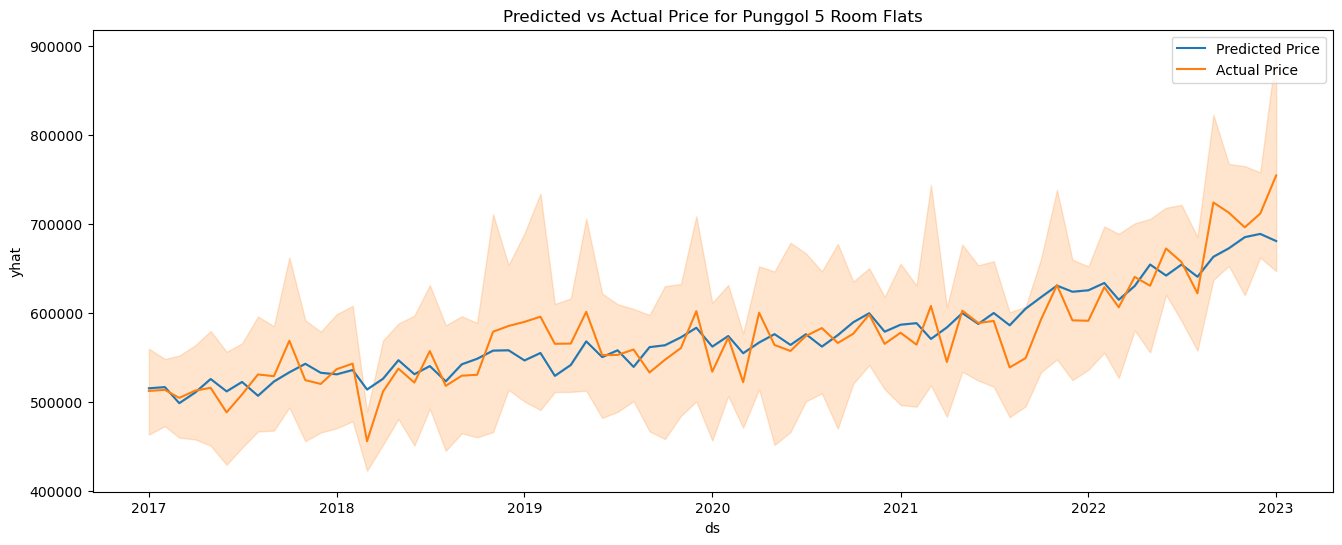

In [62]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(
    x='ds', 
    y='yhat', 
    data=predicted_df, 
    ax=ax,
    label='Predicted Price'
    )

sns.lineplot(
    x='ds', 
    y='actual_price', 
    data=predicted_df, 
    ax=ax, 
    label='Actual Price'
    )

ax.set_title('Predicted vs Actual Price for Punggol 5 Room Flats')


plt.show()

In [66]:
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

m = Prophet()
m.fit(train_set)

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

20:41:52 - cmdstanpy - INFO - Chain [1] start processing
20:41:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing
20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing
20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing
20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing
20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing
20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
df_r = performance_metrics(df_cv)
print(df_r)

    horizon           mse           rmse           mae      mape     mdape  \
0   51 days  8.541835e+09   92422.050287  79533.631563  0.149101  0.119678   
1   53 days  8.250285e+09   90831.077335  79194.996990  0.146018  0.134594   
2   57 days  8.708282e+09   93318.177832  80558.364976  0.151279  0.130663   
3   58 days  8.541246e+09   92418.860292  80145.300670  0.152215  0.130663   
4   62 days  8.877029e+09   94217.987209  80670.602165  0.151573  0.130666   
..      ...           ...            ...           ...       ...       ...   
60 355 days  1.336198e+10  115594.009437  90197.261313  0.149899  0.136553   
61 357 days  1.337754e+10  115661.328851  91374.400571  0.152478  0.136553   
62 360 days  1.265032e+10  112473.620583  91006.585270  0.154144  0.130080   
63 362 days  1.154026e+10  107425.609744  90334.658084  0.152050  0.130827   
64 365 days  1.187273e+10  108962.042852  92237.056471  0.152696  0.134410   

       smape  coverage  
0   0.140370  0.833333  
1   0.138819 

In [72]:
import itertools

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Geenrate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

# Get the best parameters
best_params = all_params[np.argmin(rmses)]
print(best_params)

21:08:22 - cmdstanpy - INFO - Chain [1] start processing
21:08:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:22 - cmdstanpy - INFO - Chain [1] start processing
21:08:22 - cmdstanpy - INFO - Chain [1] done processing
21:08:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:22 - cmdstanpy - INFO - Chain [1] start processing
21:08:23 - cmdstanpy - INFO - Chain [1] done processing
21:08:23 - cmdstanpy - INFO - Chain [1] start processing
21:08:23 - cmdstanpy - INFO - Chain [1] done processing
21:08:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:23 - cmdstanpy - INFO - Chain [1] start processing
21:08:23 - cmdstanpy - INFO - Chain [1] done processing
21:08:23 - cmdstanpy - INFO - Chain [1] start processing
21:08:23 - cmdstanpy - INFO - Chain [1] done processing
21:08:23 - cmdstanpy - INFO - Chain [1] start processing
21:08:23 - cmdstanpy - INFO - Chain [1] done processing
21:08:23 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:24 - cmdstanpy - INFO - Chain [1] start processing
21:08:24 - cmdstanpy - INFO - Chain [1] done processing
21:08:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:24 - cmdstanpy - INFO - Chain [1] start processing
21:08:24 - cmdstanpy - INFO - Chain [1] done processing
21:08:24 - cmdstanpy - INFO - Chain [1] start processing
21:08:24 - cmdstanpy - INFO - Chain [1] done processing
21:08:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:24 - cmdstanpy - INFO - Chain [1] start processing
21:08:24 - cmdstanpy - INFO - Chain [1] done processing
21:08:24 - cmdstanpy - INFO - Chain [1] start processing
21:08:24 - cmdstanpy - INFO - Chain [1] done processing
21:08:24 - cmdstanpy - INFO - Chain [1] start processing
21:08:24 - cmdstanpy - INFO - Chain [1] done processing
21:08:24 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:26 - cmdstanpy - INFO - Chain [1] start processing
21:08:26 - cmdstanpy - INFO - Chain [1] done processing
21:08:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:26 - cmdstanpy - INFO - Chain [1] start processing
21:08:26 - cmdstanpy - INFO - Chain [1] done processing
21:08:26 - cmdstanpy - INFO - Chain [1] start processing
21:08:26 - cmdstanpy - INFO - Chain [1] done processing
21:08:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:26 - cmdstanpy - INFO - Chain [1] start processing
21:08:26 - cmdstanpy - INFO - Chain [1] done processing
21:08:26 - cmdstanpy - INFO - Chain [1] start processing
21:08:26 - cmdstanpy - INFO - Chain [1] done processing
21:08:26 - cmdstanpy - INFO - Chain [1] start processing
21:08:26 - cmdstanpy - INFO - Chain [1] done processing
21:08:26 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:27 - cmdstanpy - INFO - Chain [1] start processing
21:08:27 - cmdstanpy - INFO - Chain [1] done processing
21:08:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:27 - cmdstanpy - INFO - Chain [1] start processing
21:08:27 - cmdstanpy - INFO - Chain [1] done processing
21:08:27 - cmdstanpy - INFO - Chain [1] start processing
21:08:27 - cmdstanpy - INFO - Chain [1] done processing
21:08:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:27 - cmdstanpy - INFO - Chain [1] start processing
21:08:27 - cmdstanpy - INFO - Chain [1] done processing
21:08:27 - cmdstanpy - INFO - Chain [1] start processing
21:08:27 - cmdstanpy - INFO - Chain [1] done processing
21:08:27 - cmdstanpy - INFO - Chain [1] start processing
21:08:27 - cmdstanpy - INFO - Chain [1] done processing
21:08:27 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:28 - cmdstanpy - INFO - Chain [1] start processing
21:08:28 - cmdstanpy - INFO - Chain [1] done processing
21:08:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:28 - cmdstanpy - INFO - Chain [1] start processing
21:08:29 - cmdstanpy - INFO - Chain [1] done processing
21:08:29 - cmdstanpy - INFO - Chain [1] start processing
21:08:29 - cmdstanpy - INFO - Chain [1] done processing
21:08:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:29 - cmdstanpy - INFO - Chain [1] start processing
21:08:29 - cmdstanpy - INFO - Chain [1] done processing
21:08:29 - cmdstanpy - INFO - Chain [1] start processing
21:08:29 - cmdstanpy - INFO - Chain [1] done processing
21:08:29 - cmdstanpy - INFO - Chain [1] start processing
21:08:29 - cmdstanpy - INFO - Chain [1] done processing
21:08:29 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:30 - cmdstanpy - INFO - Chain [1] start processing
21:08:30 - cmdstanpy - INFO - Chain [1] done processing
21:08:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:30 - cmdstanpy - INFO - Chain [1] start processing
21:08:30 - cmdstanpy - INFO - Chain [1] done processing
21:08:30 - cmdstanpy - INFO - Chain [1] start processing
21:08:30 - cmdstanpy - INFO - Chain [1] done processing
21:08:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:30 - cmdstanpy - INFO - Chain [1] start processing
21:08:31 - cmdstanpy - INFO - Chain [1] done processing
21:08:31 - cmdstanpy - INFO - Chain [1] start processing
21:08:31 - cmdstanpy - INFO - Chain [1] done processing
21:08:31 - cmdstanpy - INFO - Chain [1] start processing
21:08:31 - cmdstanpy - INFO - Chain [1] done processing
21:08:31 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:31 - cmdstanpy - INFO - Chain [1] start processing
21:08:31 - cmdstanpy - INFO - Chain [1] done processing
21:08:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:31 - cmdstanpy - INFO - Chain [1] start processing
21:08:32 - cmdstanpy - INFO - Chain [1] done processing
21:08:32 - cmdstanpy - INFO - Chain [1] start processing
21:08:32 - cmdstanpy - INFO - Chain [1] done processing
21:08:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:32 - cmdstanpy - INFO - Chain [1] start processing
21:08:32 - cmdstanpy - INFO - Chain [1] done processing
21:08:32 - cmdstanpy - INFO - Chain [1] start processing
21:08:32 - cmdstanpy - INFO - Chain [1] done processing
21:08:32 - cmdstanpy - INFO - Chain [1] start processing
21:08:32 - cmdstanpy - INFO - Chain [1] done processing
21:08:32 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:33 - cmdstanpy - INFO - Chain [1] start processing
21:08:34 - cmdstanpy - INFO - Chain [1] done processing
21:08:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:34 - cmdstanpy - INFO - Chain [1] start processing
21:08:34 - cmdstanpy - INFO - Chain [1] done processing
21:08:34 - cmdstanpy - INFO - Chain [1] start processing
21:08:34 - cmdstanpy - INFO - Chain [1] done processing
21:08:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:08:34 - cmdstanpy - INFO - Chain [1] start processing
21:08:36 - cmdstanpy - INFO - Chain [1] done processing
21:08:36 - cmdstanpy - INFO - Chain [1] start processing
21:08:36 - cmdstanpy - INFO - Chain [1] done processing
21:08:36 - cmdstanpy - INFO - Chain [1] start processing
21:08:36 - cmdstanpy - INFO - Chain [1] done processing
21:08:36 -

  0%|          | 0/6 [00:00<?, ?it/s]

21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:37 - cmdstanpy - INFO - Chain [1] start processing
21:08:37 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:38 - cmdstanpy - INFO - Chain [1] done processing
21:08:38 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:39 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:40 - cmdstanpy - INFO - Chain [1] start processing
21:08:40 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing
21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:42 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:44 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:45 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing
21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing
21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:47 - cmdstanpy - INFO - Chain [1] done processing


    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                     0.001                     0.01         additive   
1                     0.001                     0.01   multiplicative   
2                     0.001                     0.10         additive   
3                     0.001                     0.10   multiplicative   
4                     0.001                     1.00         additive   
5                     0.001                     1.00   multiplicative   
6                     0.001                    10.00         additive   
7                     0.001                    10.00   multiplicative   
8                     0.010                     0.01         additive   
9                     0.010                     0.01   multiplicative   
10                    0.010                     0.10         additive   
11                    0.010                     0.10   multiplicative   
12                    0.010                     1.0

21:13:05 - cmdstanpy - INFO - Chain [1] start processing
21:13:05 - cmdstanpy - INFO - Chain [1] done processing


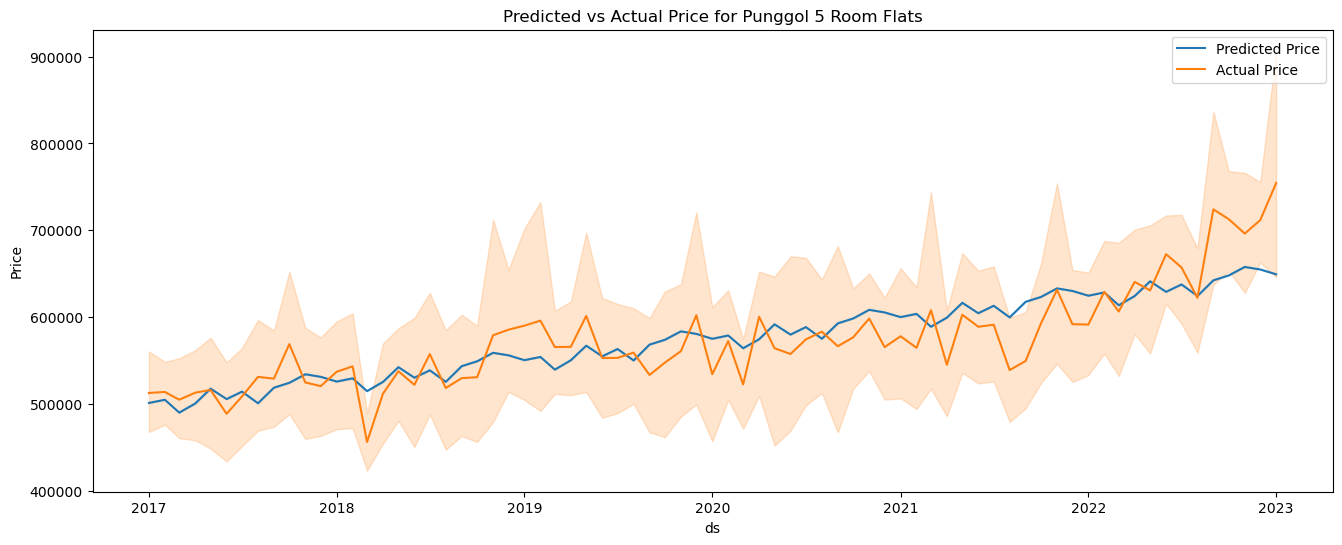

In [75]:
# Fit the model with best parameters

m = Prophet(**best_params).fit(train_set)
future = m.make_future_dataframe(periods=prediction_days, freq = 'D')
forecast = m.predict(future)

predicted_df = forecast[['ds','yhat']]
predicted_df = predicted_df.merge(df_ref, on='ds')

fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(
    x='ds', 
    y='yhat', 
    data=predicted_df, 
    ax=ax,
    label='Predicted Price'
    )

sns.lineplot(
    x='ds', 
    y='actual_price', 
    data=predicted_df, 
    ax=ax, 
    label='Actual Price'
    )

ax.set_title('Predicted vs Actual Price for Punggol 5 Room Flats')
ax.set_ylabel('Price')

plt.show()